In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import mne
from scipy import signal

In [77]:
rootdir = '/Volumes/My Passport/AI_Research/data/physionet.org/files/chbmit/1.0.0/'
patient_id = 'chb01'
filename = 'chb01_03.edf'
fpath = rootdir + '/' + patient_id + '/' + filename
raw = mne.io.read_raw_edf(input_fname=fpath)
ch_names = raw.info['ch_names']

Extracting EDF parameters from /Volumes/My Passport/AI_Research/data/physionet.org/files/chbmit/1.0.0/chb01/chb01_03.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...


<ipython-input-77-0568fa44b222>:5: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(input_fname=fpath)


In [101]:
seizure = 2996
start = seizure - 15
end = seizure + 15
data, times = raw.copy().crop(tmin=start, tmax=end).get_data(picks='all', units='uV', return_times=True)

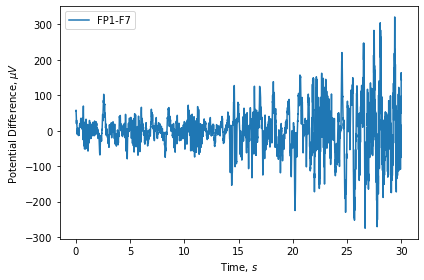

In [102]:
ax = sns.lineplot(x=times, y=data[0,:], label=str(ch_names[0]))
ax.set_xlabel('Time, $s$')
ax.set_ylabel('Potential Difference, $\mu V$')
plt.tight_layout()
plt.savefig('../figures/exploration/chb01_03_time_dom_transition.pdf')
plt.show()

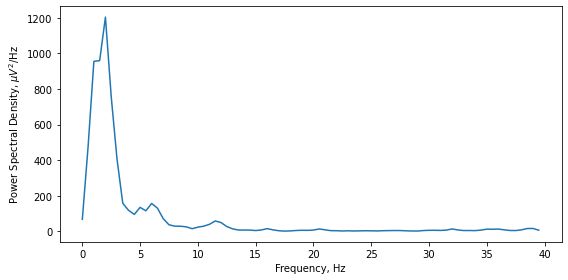

In [113]:
# Welch's periodogram with 2s window
timewindow = 2 * fs
f, Pxx_den = signal.welch(data[0,:], fs, window='hann', nperseg=timewindow)
fig, ax = plt.subplots(figsize=(8,4))
ax.plot(f[:80], Pxx_den[:80])
ax.set_xlabel('Frequency, Hz')
ax.set_ylabel(r'Power Spectral Density, $\mu V^2$/Hz')
# ax.set_title('Welch\'s Periodogram')
plt.tight_layout()
plt.savefig('../figures/exploration/chb01_03_welch_transition.pdf')
plt.show()

<ipython-input-45-ed1e3824a01c>:10: RuntimeWarning: divide by zero encountered in log10
  mesh = ax.pcolormesh(t, f, np.log10(np.abs(Zxx)), shading='gouraud')


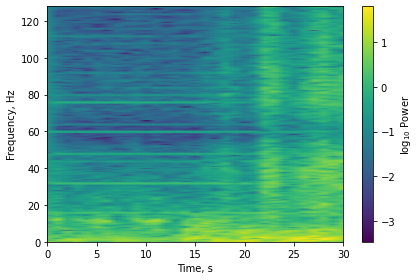

In [45]:
x = data[0,:]
fs = 256 # in Hz

timewin = 2
timewinidx = np.rint(timewin/(1/fs)).astype(int)

f, t, Zxx = signal.stft(x, fs=fs, window='hann', nperseg=timewinidx, noverlap=None, return_onesided=True)

fig, ax = plt.subplots()
mesh = ax.pcolormesh(t, f, np.log10(np.abs(Zxx)), shading='gouraud')
# ax.axvline(x=15, ls='--', c='r')
ax.set_xlabel('Time, s')
ax.set_ylabel('Frequency, Hz')
ax.set_xlim([0,30])
cbar = fig.colorbar(mesh)
cbar.ax.set_ylabel('$\log_{10}$ Power')
plt.tight_layout()
plt.savefig('../figures/exploration/chb01_03_stft.png')
plt.show()

In [84]:
start = 0
end = 30
data, times = raw.copy().crop(tmin=start, tmax=end).get_data(picks='all', units='uV', return_times=True)

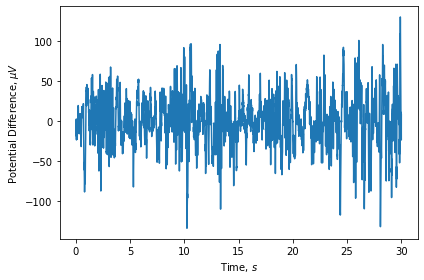

In [88]:
ax = sns.lineplot(x=times, y=data[0,:])
ax.set_xlabel('Time, $s$')
ax.set_ylabel('Potential Difference, $\mu V$')
plt.tight_layout()
plt.savefig('../figures/exploration/chb01_03_time_dom_interictal.pdf')
plt.show()

<ipython-input-89-e5f8cc997a0a>:10: RuntimeWarning: divide by zero encountered in log10
  mesh = ax.pcolormesh(t, f, np.log10(np.abs(Zxx)), shading='gouraud')


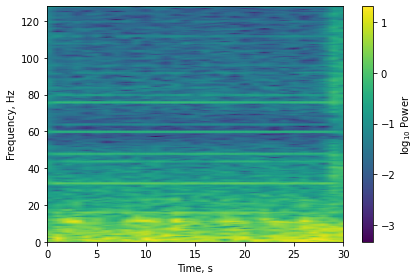

In [89]:
x = data[0,:]
fs = 256 # in Hz

timewin = 2
timewinidx = np.rint(timewin/(1/fs)).astype(int)

f, t, Zxx = signal.stft(x, fs=fs, window='hann', nperseg=timewinidx, noverlap=None, return_onesided=True)

fig, ax = plt.subplots()
mesh = ax.pcolormesh(t, f, np.log10(np.abs(Zxx)), shading='gouraud')
# ax.axvline(x=15, ls='--', c='r')
ax.set_xlabel('Time, s')
ax.set_ylabel('Frequency, Hz')
ax.set_xlim([0,30])
cbar = fig.colorbar(mesh)
cbar.ax.set_ylabel('$\log_{10}$ Power')
plt.tight_layout()
plt.savefig('../figures/exploration/chb01_03_stft_interictal.png')
plt.show()

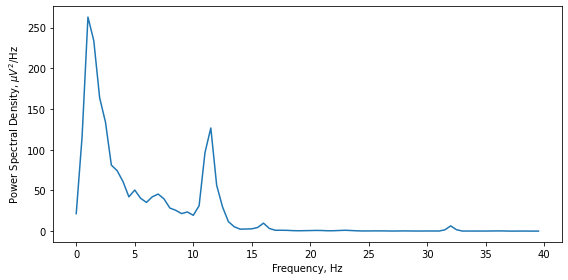

In [112]:
# Welch's periodogram with 2s window
timewindow = 2 * fs
f, Pxx_den = signal.welch(x, fs, window='hann', nperseg=timewindow)
fig, ax = plt.subplots(figsize=(8,4))
ax.plot(f[:80], Pxx_den[:80])
ax.set_xlabel('Frequency, Hz')
ax.set_ylabel(r'Power Spectral Density, $\mu V^2$/Hz')
# ax.set_title('Welch\'s Periodogram')
plt.tight_layout()
plt.savefig('../figures/exploration/chb01_03_welch_interictal.pdf')
plt.show()